Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from gumps.utilities import smoothing
from gumps.loss import loss
import scipy.stats

%matplotlib inline

Create initial data set with noise

In [2]:
x = np.linspace(0, 4*np.pi, 1000)
y = np.sin(x)
y_noise = y * scipy.stats.norm(1, 0.1).rvs(size=len(x)) + scipy.stats.norm(0, 0.1).rvs(size=len(x))

Plot the initial data set

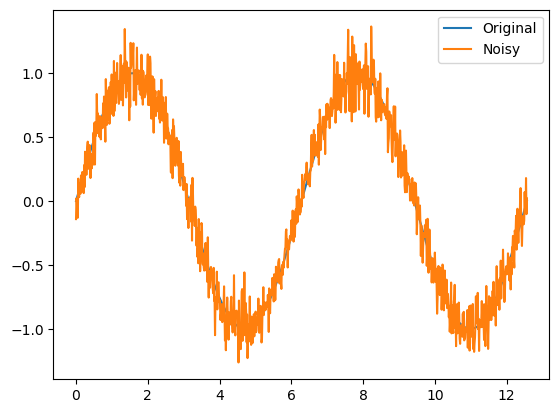

In [3]:
plt.figure()
plt.plot(x, y, label='Original')
plt.plot(x, y_noise, label='Noisy')
plt.legend()
plt.show()

Run noise removal

In [4]:
params = smoothing.SmoothingInput(pd.DataFrame({'x': x, 'y': y_noise}), 'x', 'y')
smooth = smoothing.Smoothing(params)

smoothed_signal = smooth.signal()

Plot the smoothed signal

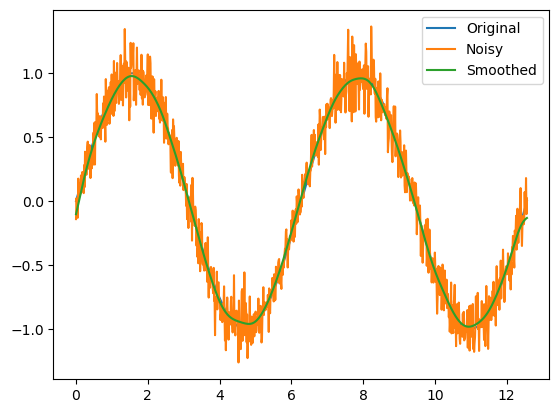

In [5]:
plt.figure()
plt.plot(x, y, label='Original')
plt.plot(x, y_noise, label='Noisy')
plt.plot(x, smoothed_signal.signal, label='Smoothed')
plt.legend()
plt.show()

Compare original signal vs the smoothed signal

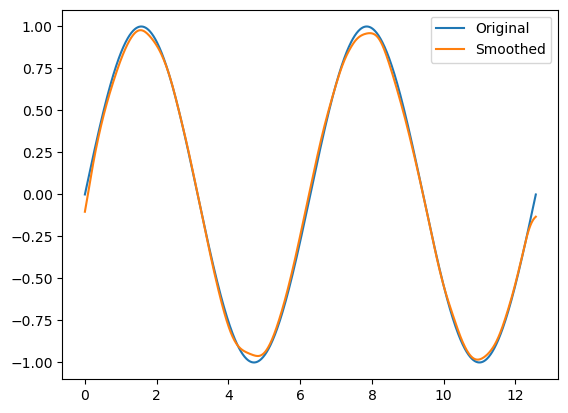

In [6]:
plt.figure()
plt.plot(x, y, label='Original')
plt.plot(x, smoothed_signal.signal, label='Smoothed')
plt.legend()
plt.show()

Numerically compare the difference between the signal

In [7]:
print(f"L2 norm before noise removal {np.linalg.norm(y_noise - y)}")
print(f"L2 norm after noise removal {np.linalg.norm(smoothed_signal.signal - y)}")

L2 norm before noise removal 3.823903651222278
L2 norm after noise removal 0.8644384970132571


Normalized Root Mean Squared Error

In [8]:
nrmse = loss.NormalizedRootMeanSquaredErrorTimeSeries(pd.DataFrame({"time":x, "signal":y}), weights=None)

print(f"NRMSE before noise removal {nrmse.calculate_loss(pd.DataFrame({'time':x, 'signal':y_noise}))['signal'] : .2e}")
print(f"NRMSE after noise removal {nrmse.calculate_loss(pd.DataFrame({'time':x, 'signal':smoothed_signal.signal}))['signal'] : .2e}")

NRMSE before noise removal  1.21e-01
NRMSE after noise removal  2.73e-02
